<a href="https://colab.research.google.com/github/KacperGrodecki/image_proccessing/blob/0.0.3/kuba_img_manip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#pip install -U pip setuptools

In [4]:
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

In [5]:
!apt-get install poppler-utils 
!apt-get install tesseract-ocr-pol
!apt-get install libleptonica-dev 
!apt-get install tesseract-ocr
!apt-get install tesseract-ocr-dev
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 46 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (230 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 160975 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-en

In [6]:
pip install pdf2image

In [7]:
pip install pytesseract 

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=675571d8c2cacd49bf736b21cc4bea478c977741e8328652bd5c7e543bb45580
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract


In [8]:
pip install autocorrect

     |████████████████████████████████| 624kB 5.2MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.3.0-cp37-none-any.whl size=621587 sha256=da73aca000d03413ddcb0ea084ec2ee319bb0d2033e478a4db84facccb8757bb
  Stored in directory: /root/.cache/pip/wheels/cc/1c/30/6b0199afbd20eef5959f5eaa0ead86aeef84391740482b2279
Successfully built autocorrect


In [9]:
#pip install pyMorfologik

In [10]:
#pip install spacy

In [11]:
#pip install https://storage.googleapis.com/spacy-pl-public-models/pl_model-1.0.0.tar.gz

In [12]:
#pip install https://github.com/spacy-pl/spaCy/archive/pl-release/lemmatizer-tagmap-and-tests.zip

In [13]:
#!python -m pip install 'drive/MyDrive/Colab Notebooks/pl_spacy_model_morfeusz-0.1.3.tar.gz'
#!python -m pip install 'drive/MyDrive/Colab Notebooks/pl_spacy_model-0.1.0.tar.gz'

In [14]:
#import spacy
#nlp=spacy.load('pl_spacy_model_morfeusz')
#nlp = spacy.load('pl_spacy_model')

In [15]:

#doc = nlp("bla bla mm scg mama sfb VD SDV jdciABDiBxhdhgzhDV 't ") 
#for token in doc:
#    print(token.text in nlp.vocab)


In [16]:
from PIL import Image 
import pytesseract 
import sys 
from pdf2image import convert_from_path 
import os
import pandas as pd
import cv2 
from pdf2image import pdfinfo_from_path,convert_from_path
import os
from PIL import Image
from pytesseract import image_to_string
import numpy as np
from matplotlib import pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
from autocorrect import Speller
from matplotlib.pyplot import figure


In [17]:
spell = Speller('pl')

dictionary for this language not found, downloading...
__________________________________________________
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
done!


In [18]:
def fig_prepare(image):
  
  kernel_3x3 = np.ones((3, 3), np.float32) / 9

  kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

  blurred = cv2.filter2D(image, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
  sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

  lower=np.array([0,0,0])
  upper=np.array([100,100,100])

  mask = cv2.inRange(sharpened, lower, upper)
  
  return 255-mask

In [19]:
def text_from_file(image):
  image_correct=fig_prepare(image)
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [20]:
def text_from_image(image):
  image_correct=image
  custom_config_letters = r'--oem 3 --psm 3'
  custom_config_digits = r'--oem 3 --psm 3 outputbase digits'
  return (image_to_string(image_correct, lang='pol',config=custom_config_letters)),(image_to_string(image_correct, lang='pol',config=custom_config_digits))

In [21]:
import re
def hasNumbers(inputString):
   return any(char.isdigit() for char in inputString)

In [22]:
def mask_from_cropped(cropped):
          kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (9, 9))
          dilated = cv2.dilate(cropped, kernel)
          eroded=cv2.erode(dilated,kernel)

          kernel_3x3 = np.ones((3, 3), np.float32) / 9

          kernel_sharpening = np.array([[-1,-1,-1], 
                                [-1, 9,-1],
                                [-1,-1,-1]])

          blurred = cv2.filter2D(eroded, -1, kernel_3x3)
          sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

          blurred = cv2.filter2D(sharpened, -1, kernel_3x3)
          sharpened = cv2.filter2D(blurred, -1, kernel_sharpening)

          

          lower=np.array([0,0,0])
          upper=np.array([130,130,130])

          return cv2.inRange(sharpened, lower, upper)

In [23]:
def countrurs(gray,ythresh): 
  thresh=255-gray
  # use morphology erode to blur horizontally
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
  morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

  #figure(figsize=(20,50))
  #plt.imshow(morph)
  #plt.show() 

  # use morphology open to remove thin lines from dotted lines
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
  morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

  #figure(figsize=(20,50))
  #plt.imshow(morph)
  #plt.show() 

  # find contours
  cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

  # find the topmost box

  for c in cntrs:
        box = cv2.boundingRect(c)
        x,y,w,h = box
        if y < ythresh:
            topbox = box
            ythresh = y
  return cntrs[::-1],topbox

In [24]:
def countrurs_canny(gray,ythresh): 
  thresh=255-gray
  thresh== cv2.Canny(thresh, 30, 200) 
  # use morphology erode to blur horizontally
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (151, 3))
  morph = cv2.morphologyEx(thresh, cv2.MORPH_DILATE, kernel)

  figure(figsize=(20,50))
  plt.imshow(morph)
  plt.show() 

  # use morphology open to remove thin lines from dotted lines
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 17))
  morph = cv2.morphologyEx(morph, cv2.MORPH_OPEN, kernel)

  figure(figsize=(20,50))
  plt.imshow(morph)
  plt.show() 

  # find contours
  cntrs = cv2.findContours(morph, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cntrs = cntrs[0] if len(cntrs) == 2 else cntrs[1]

  # find the topmost box

  for c in cntrs:
        box = cv2.boundingRect(c)
        x,y,w,h = box
        if y < ythresh:
            topbox = box
            ythresh = y
  return cntrs[::-1],topbox

In [26]:
def string_clean(word):
  word_new=word
  for char in word:
    if char.isalnum():
      pass
    else:
      word_new = word.replace(char, "")
  return word_new

In [27]:
def analyze_figures(cropped_board,mask_board,i):
   if re.search('[a-zA-Z]',image_to_string(cropped_board,lang='pol',config = r'--oem 3 --psm 3')) or re.search('[a-zA-Z]',image_to_string(mask_board, lang='pol',config= r'--oem 3 --psm 3')):
              print(i)
              string_dig_crop=image_to_string(cropped_board,lang='pol',config = r'outputbase digits')#r'--oem 3 --psm 3 outputbase digits'
              string_dig_mask=image_to_string(mask_board, lang='pol',config = r'outputbase digits')
              string_let_crop=image_to_string(cropped_board,lang='pol')
              string_let_mask=image_to_string(mask_board, lang='pol')
              
              senteces=[string_dig_crop,string_dig_mask,string_let_crop,string_let_mask]
      
              letter=''
              word_new=''
              sentence=''
              sentence_new=''
              w_len=[]

              for sen in senteces:
                for s in sen:
                  if s.isspace():
                    word_new=word_new.join(letter)
                    
                    word_new=string_clean(word_new)
                    
                    if word_new:
                      w_len.append(len(word_new))
                    letter=''
                    sentence=sentence+' '+word_new
                    word_new=''
                  else:
                    letter=letter+s
                sentence_new=sentence_new.join(sentence)
                np_w_len=np.array(w_len)
                print('full sentence',sentence_new)
                print('std ',np.std(np_w_len),'mean ',np.mean(np_w_len),'length ',np_w_len.shape)
                sentence=''
                sentence_new=''
                w_len=[]
                print('next method')
               

              figure(figsize=(20,50))
              plt.imshow(cropped_board)
              plt.show() 
              figure(figsize=(20,50))
              plt.imshow(mask_board)
              plt.show() 

In [80]:
file_d=open('drive/MyDrive/kuba/slowa.txt','r')
dictionary=[]
while file_d.readline():
  if ',' in file_d.readline():
   words = [x.strip() for x in file_d.readline().split(',')]
   for word in words:
     dictionary.append(word)
  else:
    dictionary.append(file_d.readline())

In [88]:
file_d=open('drive/MyDrive/kuba/slowa.txt','r')
dictionary=[]
while file_d.readline():
    dictionary.append(file_d.readline().replace('\n',''))

In [90]:
dictionary[1500]

'abysalnego'

13
full sentence  "PAX" ChSS KIK za rok 1971 
std  0.9574271077563381 mean  3.5 length  (6,)
next method
full sentence  a 7 O R POZ RATE   obn=cdhn=l  odlana 
std  3.0388114452858046 mean  3.375 length  (8,)
next method
full sentence  "PAX" ChSS KIK za rok 1971 
std  0.9574271077563381 mean  3.5 length  (6,)
next method
full sentence  a 7 O R POZ RATE   obn=cdhn=l  odlana 
std  3.0388114452858046 mean  3.375 length  (8,)
next method


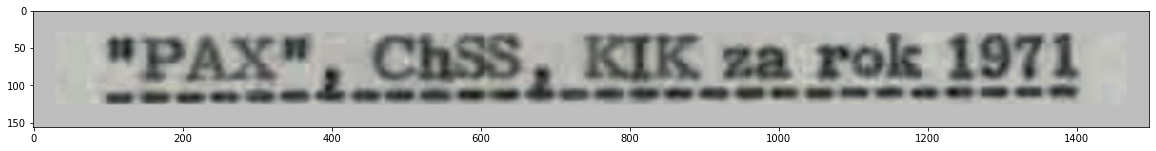

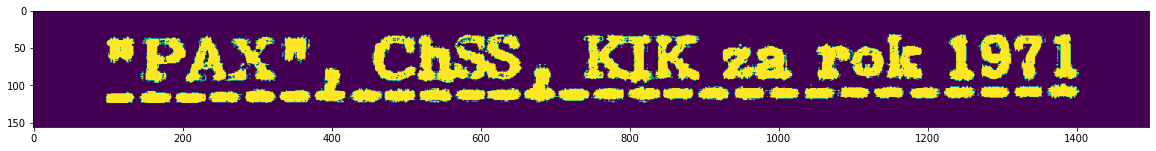

In [28]:
file='drive/MyDrive/kuba/resolution500/fig1.jpg'
image = cv2.imread(file)
gray=fig_prepare(image)

image = cv2.imread(file)
result = gray.copy()
ythresh=1000
cntrs,topbox=countrurs(gray,ythresh)
#cntrs=cntrs[::-1]
i=0
figures=[]
text=[]
for c in cntrs:
      box = cv2.boundingRect(c)
      if box != topbox:
        i=i+1
        if i==13:
          x,y,w,h = box
          cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
          cropped = image[y:y + h, x:x + w]  
    
          mask = mask_from_cropped(cropped)
          board=30
          cropped_board = cv2.copyMakeBorder( cropped, board,board, board, board,cv2.BORDER_CONSTANT, value=[190, 190, 190])
          mask_board = cv2.copyMakeBorder( mask, board, board, board, board, cv2.BORDER_CONSTANT)

          analyze_figures(cropped_board,mask_board,i)
          


In [ ]:
def containsAny(str, set):
    """ Check whether sequence str contains ANY of the items in set. """
    return 1 in [c in str for c in set]

In [ ]:
for i in range(0,80):
    print(i)
    if i>0:
      figure(figsize=(20,50))
      plt.imshow(figures[i])
      plt.show() 
      #broades(figures[i])
    if i>30:
      break


In [ ]:
def broades(fig):
  for board in [20]:
        print(board)
        mask = mask_from_cropped(fig)
        mask_broad = cv2.copyMakeBorder( mask, board,board, board, board,cv2.BORDER_CONSTANT)
        fig_broad = cv2.copyMakeBorder( fig, board,board, board, board,cv2.BORDER_CONSTANT)
  
        print('mask_broad',image_to_string(mask_broad,lang='pol'))
        print('mask_broad_dig',image_to_string(mask_broad,lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
        print('fig_broad_dig',image_to_string(fig_broad,lang='pol',config = r'--oem 3 --psm 3 outputbase digits'))
        figure(figsize=(20,50))
        plt.imshow(mask_broad)
        plt.show() 

In [ ]:
for i in range(0,80):
    #print(i)
    if i==21:
      figure(figsize=(20,50))
      plt.imshow(figures[i])
      plt.show() 
      broades(figures[i])
    if i>30:
      break